# Importamos y combinamos los datos

In [12]:
import pandas as pd
import re
import string
import numpy as np
import sys
sys.path.append('../')
import funciones as fn
import codecs
import seaborn as sns
import matplotlib.pyplot as plt
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [59]:
df = pd.read_excel("E:\Base bonita\Semanales\Semana1.xlsx")
xenofobia = fn.limpieza_base(df)
del_cols=["Query_Name", "Url", "Page_Type", "Language", "Country_Code", "Continent", "Continent_Code", 
          "Country", "Added", "Assignment", "Avatar", "Category_Details", 
          "Checked", "Display_URLs", "Expanded_URLs", "Facebook_Author_ID", "Facebook_Comments",
          "Facebook_Likes", "Facebook_Role", "Facebook_Shares", "Facebook_Subtype",
          "Full_Text", "Full_Name", "Instagram_Comments", "Instagram_Followers", "Instagram_Following",
          "Instagram_Likes", "Instagram_Interactions_Count", "Instagram_Posts",
          "Last_Assignment_Date", "Latitude", "Location_Name", "Longitude", "Media_Filter",
          "Media_URLs", "Original_Url", "Priority", "Short_URLs", "Resource_Id", "Starred",
          "Status", "Subtype", "Thread_Created_Date", "Thread_Id",
          "Thread_URL", "Twitter_Author_ID", "Twitter_Channel_Role", "Twitter_Reply_to", "Twitter_Retweet_of", 
          "Updated", "Blog_Name", "Copyright", "Item_Review", "Page_Type_Name", "Linkedin_Comments", 
          "Linkedin_Engagement", "Linkedin_Impressions", "Linkedin_Likes", "Linkedin_Shares", "Linkedin_Sponsored", 
          "Linkedin_Video_Views", "Parent_Blog_Name", "Parent_Post_Id", "Pub_Type", "Publisher_Sub_Type", "Rating", 
          "Reddit_Score", "Region", "Region_Code", "Root_Blog_Name", "Root_Post_Id", "Weblog_Title", "Title", "Tags"]
pruebas = codecs.open('Columnas_a_eliminar.txt','r',encoding='utf-8')
more_cols = list()
for line in pruebas.readlines():
    more_cols.append(line.strip())
del_cols = del_cols + more_cols
print(del_cols)
xenofobia = xenofobia.drop(del_cols, axis=1)
for col in xenofobia.columns: 
    print(col)
xenofobia.head(11)

C:\Users\JOSE\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


['Query_Name', 'Url', 'Page_Type', 'Language', 'Country_Code', 'Continent', 'Continent_Code', 'Country', 'Added', 'Assignment', 'Avatar', 'Category_Details', 'Checked', 'Display_URLs', 'Expanded_URLs', 'Facebook_Author_ID', 'Facebook_Comments', 'Facebook_Likes', 'Facebook_Role', 'Facebook_Shares', 'Facebook_Subtype', 'Full_Text', 'Full_Name', 'Instagram_Comments', 'Instagram_Followers', 'Instagram_Following', 'Instagram_Likes', 'Instagram_Interactions_Count', 'Instagram_Posts', 'Last_Assignment_Date', 'Latitude', 'Location_Name', 'Longitude', 'Media_Filter', 'Media_URLs', 'Original_Url', 'Priority', 'Short_URLs', 'Resource_Id', 'Starred', 'Status', 'Subtype', 'Thread_Created_Date', 'Thread_Id', 'Thread_URL', 'Twitter_Author_ID', 'Twitter_Channel_Role', 'Twitter_Reply_to', 'Twitter_Retweet_of', 'Updated', 'Blog_Name', 'Copyright', 'Item_Review', 'Page_Type_Name', 'Linkedin_Comments', 'Linkedin_Engagement', 'Linkedin_Impressions', 'Linkedin_Likes', 'Linkedin_Shares', 'Linkedin_Sponsored'

Date                                            Snippet  \
0   2020-01-08 23:59:57.0  Justamente le acabe el guacamole picante al ve...   
1   2020-01-08 23:59:20.0  RT @tiangyyahoocom1 @carlaangola @jguaido Vas ...   
2   2020-01-08 23:59:20.0  ...1141486160931430407] El seleccionado catarí...   
3   2020-01-08 23:58:23.0  RT @soniachocron Amanecí pensando que la polít...   
4   2020-01-08 23:58:10.0  @NTN24ve EL QUE NO SABE CON QUIEN SE METE ES L...   
5   2020-01-08 23:55:42.0  @NoticiasCaracol Los venezolanos siempre esper...   
6   2020-01-08 23:54:39.0  RT @JoseRadaRoldan Ojalá ésto no quede en un s...   
7   2020-01-08 23:54:14.0  Los 6 puntos q trata la cartica denota su prox...   
8   2020-01-08 23:53:05.0  RT @OlimpicoCol El seleccionado argentino🇦🇷 ga...   
9   2020-01-08 23:51:35.0  RT @carlos8a210856 #MovimientoUribista Para es...   
10  2020-01-08 23:51:06.0  @OlimpicoCol El seleccionado argentino🇦🇷 ganó ...   

            Domain Sentiment               City_Code Account_Type  \
0      twitter.com   neutral       COL.Bogota.Bogota   individual   
1      twitter.com  negative       COL.Bogota.Bogota   individual   
2   vanguardia.com   neutral                     NaN          NaN   
3      twitter.com  positive       COL.Bogota.Bogota   individual   
4      twitter.com  positive  COL.Antioquia.Medellin   individual   
5      twitter.com  negative  COL.Antioquia.Medellin   individual   
6      twitter.com  negative       COL.Bogota.Bogota   individual   
7      twitter.com   neutral       COL.Bogota.Bogota   individual   
8      twitter.com   neutral       COL.Bogota.Bogota   individual   
9      twitter.com  negative       COL.Bogota.Bogota   individual   
10     twitter.com   neutral                     NaN   individual   

             Author      City   Gender             Hashtags  ...  \
0        Hector_Jk7    Bogota     male                  NaN  ...   
1      misterpatria    Bogota  unknown                  NaN  ...   
2               NaN       NaN  unknown                  NaN  ...   
3      AseretPradoO    Bogota  unknown                  NaN  ...   
4      LeilaLozano3  Medellin   female                  NaN  ...   
5          0rwell07  Medellin     male                  NaN  ...   
6      claudita1956    Bogota   female                  NaN  ...   
7   PartidoRepubl14    Bogota  unknown                  NaN  ...   
8      PauloCCortes    Bogota     male                  NaN  ...   
9      claudita1956    Bogota   female  #movimientouribista  ...   
10      OlimpicoCol       NaN  unknown                  NaN  ...   

   Categoría_Barometro_v3_-_Seguridad_  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                    X   
5                                  NaN   
6                                  NaN   
7                                    X   
8                                  NaN   
9                                    X   
10                                 NaN   

   Categoría_Barometro_v4_-_Denuncia_Xenofobia  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
5                                          NaN   
6                                          NaN   
7                                          NaN   
8                                          NaN   
9                                          NaN   
10                                         NaN   

   Categoría_Barometro_v4_-_Xenofobia Categorías_prueba_-_Denuncia  \
0                                 NaN                          NaN   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                           

In [60]:
del_cols=["Query_Name", "Url", "Page_Type", "Language", "Country_Code", "Continent", "Continent_Code", 
          "Country", "Added", "Assignment", "Avatar", "Category_Details", 
          "Checked", "Display_URLs", "Expanded_URLs", "Facebook_Author_ID", "Facebook_Comments",
          "Facebook_Likes", "Facebook_Role", "Facebook_Shares", "Facebook_Subtype",
          "Full_Text", "Full_Name", "Instagram_Comments", "Instagram_Followers", "Instagram_Following",
          "Instagram_Likes", "Instagram_Interactions_Count", "Instagram_Posts",
          "Last_Assignment_Date", "Latitude", "Location_Name", "Longitude", "Media_Filter",
          "Media_URLs", "Original_Url", "Priority", "Short_URLs", "Resource_Id", "Starred",
          "Status", "Subtype", "Thread_Created_Date", "Thread_Id",
          "Thread_URL", "Twitter_Author_ID", "Twitter_Channel_Role", "Twitter_Reply_to", "Twitter_Retweet_of", 
          "Updated", "Blog_Name", "Copyright", "Item_Review", "Page_Type_Name", "Linkedin_Comments", 
          "Linkedin_Engagement", "Linkedin_Impressions", "Linkedin_Likes", "Linkedin_Shares", "Linkedin_Sponsored", 
          "Linkedin_Video_Views", "Parent_Blog_Name", "Parent_Post_Id", "Pub_Type", "Publisher_Sub_Type", "Rating", 
          "Reddit_Score", "Region", "Region_Code", "Root_Blog_Name", "Root_Post_Id", "Weblog_Title", "Title", "Tags"]
pruebas = codecs.open('Columnas_a_eliminar.txt','r',encoding='utf-8')
more_cols = list()
for line in pruebas.readlines():
    more_cols.append(line.strip())
del_cols = del_cols + more_cols
i = 1
while i < 60:
    path = "E:\Base bonita\Semanales\Semana" + str(i) + ".xlsx"
    df = pd.read_excel(path)
    base=fn.limpieza_base(df)
    try:
        base = base.drop(del_cols, axis=1)
    except: print("Alguna columna a borrar no se encuentra en la base")
    print("Tamaño de la base" + str(i) + " : " + str(base.shape))
    if i == 1:
        final = base
    else: final = final.append(base)
    i += 1
final['Clean_text']= final['Snippet'].replace(r'(.)\1+', r'\1\1', regex=True).str.strip()
final['Clean_text']= final['Clean_text'].replace('\s+', ' ', regex=True).str.strip()
final['Clean_text']= final['Clean_text'].replace(r"http\S+", '', regex=True)
final['Clean_text']= final['Clean_text'].astype(str)
final = final[~final['Clean_text'].str.startswith('RT')]
final

C:\Users\JOSE\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Tamaño de la base1 : (12830, 35)
Tamaño de la base2 : (12710, 35)
Tamaño de la base3 : (15323, 35)
Tamaño de la base4 : (19112, 35)
Tamaño de la base5 : (14629, 35)
Tamaño de la base6 : (14722, 35)
Tamaño de la base7 : (18233, 35)
Tamaño de la base8 : (11825, 35)
Tamaño de la base9 : (10724, 35)
Tamaño de la base10 : (19752, 35)
Tamaño de la base11 : (46763, 35)
Tamaño de la base12 : (69118, 35)
Tamaño de la base13 : (29270, 35)
Tamaño de la base14 : (16475, 35)
Tamaño de la base15 : (12450, 35)
Tamaño de la base16 : (21702, 35)
Tamaño de la base17 : (15288, 35)
Tamaño de la base18 : (12796, 35)
Tamaño de la base19 : (12705, 35)
Tamaño de la base20 : (14480, 35)
Tamaño de la base21 : (14102, 35)
Tamaño de la base22 : (11797, 35)
Tamaño de la base23 : (14771, 35)
Tamaño de la base24 : (23613, 35)
Tamaño de la base25 : (14762, 35)
Tamaño de la base26 : (13751, 35)
Tamaño de la base27 : (9136, 35)
Tamaño de la base28 : (8907, 35)
Tamaño de la base29 : (9299, 35)
Tamaño de la base30 : (105

Date  \
0      2020-01-08 23:59:57.0   
2      2020-01-08 23:59:20.0   
4      2020-01-08 23:58:10.0   
5      2020-01-08 23:55:42.0   
7      2020-01-08 23:54:14.0   
...                      ...   
46995  2021-03-08 00:11:19.0   
46996  2021-03-08 00:10:35.0   
47000  2021-03-08 00:07:01.0   
47001  2021-03-08 00:05:02.0   
47004  2021-03-08 00:02:23.0   

                                                 Snippet           Domain  \
0      Justamente le acabe el guacamole picante al ve...      twitter.com   
2      ...1141486160931430407] El seleccionado catarí...   vanguardia.com   
4      @NTN24ve EL QUE NO SABE CON QUIEN SE METE ES L...      twitter.com   
5      @NoticiasCaracol Los venezolanos siempre esper...      twitter.com   
7      Los 6 puntos q trata la cartica denota su prox...      twitter.com   
...                                                  ...              ...   
46995  @yoligrilla @elespectador Y este gobierno colo...      twitter.com   
46996  ..., y de taquito se la sirvió a Yesus Cabrera...  primertiempo.co   
47000  Eduardo Sosa, José David Barragán y José Luis ...      twitter.com   
47001  La venezolana Jenny Camacho es la mente maestr...      twitter.com   
47004  @fpcwin uno de los venezolanos buenos en su pa...      twitter.com   

      Sentiment                 City_Code Account_Type           Author  \
0       neutral         COL.Bogota.Bogota   individual       Hector_Jk7   
2       neutral                       NaN          NaN              NaN   
4      positive    COL.Antioquia.Medellin   individual     LeilaLozano3   
5      negative    COL.Antioquia.Medellin   individual         0rwell07   
7       neutral         COL.Bogota.Bogota   individual  PartidoRepubl14   
...         ...                       ...          ...              ...   
46995   neutral                       NaN   individual         RamonEdo   
46996  negative                       NaN          NaN              NaN   
47000  positive         COL.Bogota.Bogota   individual    riosgonzalezp   
47001   neutral         COL.Bogota.Bogota   individual    dinersrevista   
47004  positive  COL.Valle del Cauca.Cali   individual       Humobanda1   

           City   Gender Hashtags  ...  \
0        Bogota     male      NaN  ...   
2           NaN  unknown      NaN  ...   
4      Medellin   female      NaN  ...   
5      Medellin     male      NaN  ...   
7        Bogota  unknown      NaN  ...   
...         ...      ...      ...  ...   
46995       NaN  unknown      NaN  ...   
46996       NaN  unknown      NaN  ...   
47000    Bogota     male      NaN  ...   
47001    Bogota  unknown      NaN  ...   
47004      Cali     male      NaN  ...   

      Categoría_Barometro_v4_-_Denuncia_Xenofobia  \
0                                             NaN   
2                                             NaN   
4                                             NaN   
5                                             NaN   
7                                             NaN   
...                                           ...   
46995                                         NaN   
46996                                         NaN   
47000                                         NaN   
47001                                         NaN   
47004                                         NaN   

      Categoría_Barometro_v4_-_Xenofobia Categorías_prueba_-_Denuncia  \
0                                    NaN                          NaN   
2                                    NaN                          NaN   
4                                    NaN                          NaN   
5                                    NaN                          NaN   
7                                    NaN                          NaN   
...                                  ...                          ...   
46995                                NaN                          NaN   
46996                                NaN                          NaN   
47000         

In [61]:
for col in final.columns: 
    print(col)

Date
Snippet
Domain
Sentiment
City_Code
Account_Type
Author
City
Gender
Hashtags
Impact
Impressions
Interest
Mentioned_Authors
Professions
Thread_Author
Thread_Entry_Type
Total_Monthly_Visitors
Twitter_Followers
Twitter_Following
Twitter_Reply_Count
Twitter_Retweets
Twitter_Tweets
Twitter_Verified
Reach_(new)
Categoría_Barometro_v3_-_Seguridad_
Categoría_Barometro_v4_-_Denuncia_Xenofobia
Categoría_Barometro_v4_-_Xenofobia
Categorías_prueba_-_Denuncia
Categorías_prueba_-_Xenofobia
Categorías_prueba_-_denuncia_xenofobia_cl
Categorías_prueba_-_denuncia_xenofobia_col
xenofobia_e_Integración_-_Integración
xenofobia_e_Integración_-_Xenofobia
xenofobia_e_Integración_-_not_xenofobia
Clean_text


In [62]:
final.to_excel("Base_semanal_pegada.xlsx") 

In [2]:
final = pd.read_excel("Base_semanal_pegada.xlsx")
final.head(11)

Unnamed: 0                   Date  \
0            0  2020-01-08 23:59:57.0   
1            2  2020-01-08 23:59:20.0   
2            4  2020-01-08 23:58:10.0   
3            5  2020-01-08 23:55:42.0   
4            7  2020-01-08 23:54:14.0   
5           10  2020-01-08 23:51:06.0   
6           15  2020-01-08 23:45:40.0   
7           19  2020-01-08 23:44:19.0   
8           22  2020-01-08 23:40:00.0   
9           23  2020-01-08 23:39:31.0   
10          25  2020-01-08 23:38:48.0   

                                              Snippet          Domain  \
0   Justamente le acabe el guacamole picante al ve...     twitter.com   
1   ...1141486160931430407] El seleccionado catarí...  vanguardia.com   
2   @NTN24ve EL QUE NO SABE CON QUIEN SE METE ES L...     twitter.com   
3   @NoticiasCaracol Los venezolanos siempre esper...     twitter.com   
4   Los 6 puntos q trata la cartica denota su prox...     twitter.com   
5   @OlimpicoCol El seleccionado argentino🇦🇷 ganó ...     twitter.com   
6   En su mentalidad facha DESADAPTADO es:Estudian...     twitter.com   
7   El adulto mayor venezolano, Guillermo Antonio ...     twitter.com   
8   #Colombia El informe señaló que de estos críme...     twitter.com   
9   @Chriscaal @Citytv Y porq los Venecos andan re...     twitter.com   
10   Ok los venezolanos a la fuerza o por elecciones?     twitter.com   

   Sentiment                   City_Code Account_Type           Author  \
0    neutral           COL.Bogota.Bogota   individual       Hector_Jk7   
1    neutral                         NaN          NaN              NaN   
2   positive      COL.Antioquia.Medellin   individual     LeilaLozano3   
3   negative      COL.Antioquia.Medellin   individual         0rwell07   
4    neutral           COL.Bogota.Bogota   individual  PartidoRepubl14   
5    neutral                         NaN   individual      OlimpicoCol   
6   negative           COL.Bogota.Bogota   individual     Fernand20191   
7    neutral  COL.Atlantico.Barranquilla   individual    Fontalvoedgar   
8    neutral       COL.Bolivar.Cartagena   individual   ElUniversalCtg   
9   positive                         NaN   individual   ELCARECHINVA13   
10  negative           COL.Bogota.Bogota   individual    AngelLopezR22   

            City   Gender  ... Categoría_Barometro_v4_-_Denuncia_Xenofobia  \
0         Bogota     male  ...                                         NaN   
1            NaN  unknown  ...                                         NaN   
2       Medellin   female  ...                                         NaN   
3       Medellin     male  ...                                         NaN   
4         Bogota  unknown  ...                                         NaN   
5            NaN  unknown  ...                                         NaN   
6         Bogota  unknown  ...                                         NaN   
7   Barranquilla     male  ...                                         NaN   
8      Cartagena  unknown  ...                                         NaN   
9            NaN  unknown  ...                                         NaN   
10        Bogota     male  ...                                         NaN   

    Categoría_Barometro_v4_-_Xenofobia  Categorías_prueba_-_Denuncia  \
0                                  NaN                           NaN   
1                                  NaN                           NaN   
2                                  NaN                           NaN   
3                                  NaN                           NaN   
4                                  NaN                           NaN   
5                                  NaN                           NaN   
6                                  NaN                           NaN   
7                                  NaN                           NaN   
8                                  NaN                           NaN   
9                                  NaN                           NaN   
10              

In [3]:
#Vamos a importar la base marcada
marcada = pd.read_excel("Base_marcada_limpia.xlsx")
marcada.head(11)

ID                                            Snippet  Victima  \
0    0  Una vez llegué a mi casa y habían 5 venezolano...        0   
1    1  Soy venezolano y es triste admitir esa realida...        1   
2    2  Hice Dulce de lechosa venezolano oyendo y bail...        0   
3    3  @Roberto_MunozC Me refería al mercado interno ...        0   
4    4  @kenin_nunez @SOMOSRIOCRECID Estos venecos, ha...        0   
5    5  @penfold_michael De hoy a finales del 2022 ser...        1   
6    6  #1Feb 🇻🇪 Decenas de migrantes venezolanos se e...        0   
7    7  @BrianSnow007 @anGspot @iKarlyzr Eso es falso,...        1   
8    8  ..mexicano Wade Torres en la guitarra y el col...        0   
9    9           @fabrorejon Vergacion, ya se puso veneco        1   
10  10  @Salas91Adrian @Camilousuga11 @SaqueLargoWin A...        1   

    Victimario  Xenofobia  Denuncia  Positiva  Tag 666 777  
0            0          0         0         1            0  
1            0          0         0         1            0  
2            0          0         0         0            0  
3            0          0         0         0            0  
4            0          1         0         0            0  
5            0          0         0         0            0  
6            0          0         0         0            0  
7            0          1         1         0            0  
8            0          0         0         0            0  
9            0          1         0         0            0  
10           0          1         0         0            0

In [4]:
base_merge = pd.merge(marcada, final, how='left', left_on='Snippet', right_on='Clean_text')

In [5]:
base_merge

ID                                          Snippet_x  Victima  \
0            0  Una vez llegué a mi casa y habían 5 venezolano...        0   
1            1  Soy venezolano y es triste admitir esa realida...        1   
2            2  Hice Dulce de lechosa venezolano oyendo y bail...        0   
3            3  @Roberto_MunozC Me refería al mercado interno ...        0   
4            4  @kenin_nunez @SOMOSRIOCRECID Estos venecos, ha...        0   
...        ...                                                ...      ...   
712999  562547  @kikscamp Creo que estamos viendo marchas dife...        0   
713000  562548  @WRadioColombia Llora por los venezolanos, por...        0   
713001  562549  Un pastor cristiano fue atacado por un migrant...        0   
713002  562550  @NoticiasRCN Están cagaos porque su guarida ve...        0   
713003  562551  Ante la masiva llegada de población migrante d...        0   

        Victimario  Xenofobia  Denuncia  Positiva  Tag 666 777  Unnamed: 0  \
0                0          0         0         1            0      6389.0   
1                0          0         0         1            0      6392.0   
2                0          0         0         0            0      6393.0   
3                0          0         0         0            0      6395.0   
4                0          1         0         0            0      6396.0   
...            ...        ...       ...       ...          ...         ...   
712999           0          0         0         0            0         NaN   
713000           0          0         0         0            0         NaN   
713001           0          0         0         0            0         NaN   
713002           0          0         0         0            0         NaN   
713003           0          0         0         0            0         NaN   

                         Date  ...  \
0       2021-02-02 00:41:21.0  ...   
1       2021-02-02 00:39:38.0  ...   
2       2021-02-02 00:37:54.0  ...   
3       2021-02-02 00:36:22.0  ...   
4       2021-02-02 00:35:35.0  ...   
...                       ...  ...   
712999                    NaN  ...   
713000                    NaN  ...   
713001                    NaN  ...   
713002                    NaN  ...   
713003                    NaN  ...   

       Categoría_Barometro_v4_-_Denuncia_Xenofobia  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
...                                            ...   
712999                                         NaN   
713000                                         NaN   
713001                                         NaN   
713002                                         NaN   
713003                                         NaN   

       Categoría_Barometro_v4_-_Xenofobia Categorías_prueba_-_Denuncia  \
0                                     NaN                          NaN   
1                                     NaN                          NaN   
2                                     NaN                          NaN   
3                                     NaN                          NaN   
4                                     NaN                          NaN   
...                                   ...                          ...   
712999                                NaN                          NaN   
713000                                NaN                          NaN   
713001                                NaN                          NaN   
713002                                NaN                          NaN   
713003                                NaN                          NaN   

       Categorías_prueba_-_Xenofobia  \
0                                NaN   
1                                NaN   
2                      

In [6]:
marcada['pseudo_id1'] = marcada['Snippet'].str.split().str.get(0)
marcada['pseudo_id2'] = marcada['Snippet'].str.len()
marcada['pseudo_id'] = marcada['pseudo_id1'] + marcada['pseudo_id2'].astype(str)
marcada = marcada.drop(['pseudo_id1', 'pseudo_id2'], axis = 1)
final['pseudo_id1'] = final['Clean_text'].str.split().str.get(0) 
final['pseudo_id2'] = final['Clean_text'].str.len()
final['pseudo_id'] = final['pseudo_id1'] + final['pseudo_id2'].astype(str)
final = final.drop(['pseudo_id1', 'pseudo_id2'], axis = 1)
base_merge_pseudo_id = pd.merge(marcada, final, how='left', left_on='pseudo_id', right_on='pseudo_id')
base_merge_pseudo_id

ID                                          Snippet_x  Victima  \
0            0  Una vez llegué a mi casa y habían 5 venezolano...        0   
1            1  Soy venezolano y es triste admitir esa realida...        1   
2            2  Hice Dulce de lechosa venezolano oyendo y bail...        0   
3            3  @Roberto_MunozC Me refería al mercado interno ...        0   
4            4  @kenin_nunez @SOMOSRIOCRECID Estos venecos, ha...        0   
...        ...                                                ...      ...   
562545  562547  @kikscamp Creo que estamos viendo marchas dife...        0   
562546  562548  @WRadioColombia Llora por los venezolanos, por...        0   
562547  562549  Un pastor cristiano fue atacado por un migrant...        0   
562548  562550  @NoticiasRCN Están cagaos porque su guarida ve...        0   
562549  562551  Ante la masiva llegada de población migrante d...        0   

        Victimario  Xenofobia  Denuncia  Positiva  Tag 666 777  \
0                0          0         0         1            0   
1                0          0         0         1            0   
2                0          0         0         0            0   
3                0          0         0         0            0   
4                0          1         0         0            0   
...            ...        ...       ...       ...          ...   
562545           0          0         0         0            0   
562546           0          0         0         0            0   
562547           0          0         0         0            0   
562548           0          0         0         0            0   
562549           0          0         0         0            0   

                   pseudo_id  Unnamed: 0  ...  \
0                   Una237.0         NaN  ...   
1                   Soy165.0         NaN  ...   
2                  Hice222.0         NaN  ...   
3        @Roberto_MunozC65.0         NaN  ...   
4           @kenin_nunez66.0         NaN  ...   
...                      ...         ...  ...   
562545        @kikscamp288.0         NaN  ...   
562546  @WRadioColombia160.0         NaN  ...   
562547               Un128.0         NaN  ...   
562548      @NoticiasRCN68.0         NaN  ...   
562549             Ante250.0         NaN  ...   

       Categoría_Barometro_v4_-_Denuncia_Xenofobia  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
...                                            ...   
562545                                         NaN   
562546                                         NaN   
562547                                         NaN   
562548                                         NaN   
562549                                         NaN   

       Categoría_Barometro_v4_-_Xenofobia Categorías_prueba_-_Denuncia  \
0                                     NaN                          NaN   
1                                     NaN                          NaN   
2                                     NaN                          NaN   
3                                     NaN                          NaN   
4                                     NaN                          NaN   
...                                   ...                          ...   
562545                                NaN                          NaN   
562546                                NaN                          NaN   
562547                                NaN                          NaN   
562548                                NaN                          NaN   
562549                                NaN                          NaN   

       Categorías_prueba_-_Xenofobia  \
0                                NaN   
1                                NaN   
2                                Na

In [7]:
base_merge_3_pseudo_id = base_merge_pseudo_id[base_merge_pseudo_id['Clean_text'].notna()]
base_merge_3_pseudo_id

Empty DataFrame
Columns: [ID, Snippet_x, Victima, Victimario, Xenofobia, Denuncia, Positiva, Tag 666 777, pseudo_id, Unnamed: 0, Date, Snippet_y, Domain, Sentiment, City_Code, Account_Type, Author, City, Gender, Hashtags, Impact, Impressions, Interest, Mentioned_Authors, Professions, Thread_Author, Thread_Entry_Type, Total_Monthly_Visitors, Twitter_Followers, Twitter_Following, Twitter_Reply_Count, Twitter_Retweets, Twitter_Tweets, Twitter_Verified, Reach_(new), Categoría_Barometro_v3_-_Seguridad_, Categoría_Barometro_v4_-_Denuncia_Xenofobia, Categoría_Barometro_v4_-_Xenofobia, Categorías_prueba_-_Denuncia, Categorías_prueba_-_Xenofobia, Categorías_prueba_-_denuncia_xenofobia_cl, Categorías_prueba_-_denuncia_xenofobia_col, xenofobia_e_Integración_-_Integración, xenofobia_e_Integración_-_Xenofobia, xenofobia_e_Integración_-_not_xenofobia, Clean_text]
Index: []

[0 rows x 46 columns]

In [8]:
base_merge_3 = base_merge[base_merge['Clean_text'].notna()]
base_merge_3

ID                                          Snippet_x  Victima  \
0            0  Una vez llegué a mi casa y habían 5 venezolano...        0   
1            1  Soy venezolano y es triste admitir esa realida...        1   
2            2  Hice Dulce de lechosa venezolano oyendo y bail...        0   
3            3  @Roberto_MunozC Me refería al mercado interno ...        0   
4            4  @kenin_nunez @SOMOSRIOCRECID Estos venecos, ha...        0   
...        ...                                                ...      ...   
712202  561753                                    @venecoact hola        0   
712203  561753                                    @venecoact hola        0   
712204  561753                                    @venecoact hola        0   
712205  561753                                    @venecoact hola        0   
712927  562475                                Venecoo de mi vidaa        0   

        Victimario  Xenofobia  Denuncia  Positiva  Tag 666 777  Unnamed: 0  \
0                0          0         0         1            0      6389.0   
1                0          0         0         1            0      6392.0   
2                0          0         0         0            0      6393.0   
3                0          0         0         0            0      6395.0   
4                0          1         0         0            0      6396.0   
...            ...        ...       ...       ...          ...         ...   
712202           0          0         0         0            0      4064.0   
712203           0          0         0         0            0      5737.0   
712204           0          0         0         0            0      6132.0   
712205           0          0         0         0            0     13100.0   
712927           0          0         0         0            0       893.0   

                         Date  ...  \
0       2021-02-02 00:41:21.0  ...   
1       2021-02-02 00:39:38.0  ...   
2       2021-02-02 00:37:54.0  ...   
3       2021-02-02 00:36:22.0  ...   
4       2021-02-02 00:35:35.0  ...   
...                       ...  ...   
712202  2020-06-21 03:09:38.0  ...   
712203  2020-07-23 16:17:43.0  ...   
712204  2020-08-12 03:46:06.0  ...   
712205  2020-09-07 05:10:34.0  ...   
712927  2020-10-11 02:36:54.0  ...   

       Categoría_Barometro_v4_-_Denuncia_Xenofobia  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
...                                            ...   
712202                                         NaN   
712203                                         NaN   
712204                                         NaN   
712205                                         NaN   
712927                                         NaN   

       Categoría_Barometro_v4_-_Xenofobia Categorías_prueba_-_Denuncia  \
0                                     NaN                          NaN   
1                                     NaN                          NaN   
2                                     NaN                          NaN   
3                                     NaN                          NaN   
4                                     NaN                          NaN   
...                                   ...                          ...   
712202                                NaN                          NaN   
712203                                NaN                          NaN   
712204                                NaN                          NaN   
712205                                NaN                          NaN   
712927                                NaN                          NaN   

       Categorías_prueba_-_Xenofobia  \
0                                NaN   
1                                NaN   
2                      

In [9]:
# "ID"
base_merge_3= (base_merge_3.reset_index()
                           .drop(["index", "ID"], axis = 1))
print(base_merge_3.dtypes)

Snippet_x                                       object
Victima                                          int64
Victimario                                       int64
Xenofobia                                        int64
Denuncia                                         int64
Positiva                                         int64
Tag 666 777                                      int64
Unnamed: 0                                     float64
Date                                            object
Snippet_y                                       object
Domain                                          object
Sentiment                                       object
City_Code                                       object
Account_Type                                    object
Author                                          object
City                                            object
Gender                                          object
Hashtags                                        object
Impact    

In [10]:
base_merge_3['Date'] =  pd.to_datetime(base_merge_3['Date'], infer_datetime_format=True)
base_merge_3

Snippet_x  Victima  \
0       Una vez llegué a mi casa y habían 5 venezolano...        0   
1       Soy venezolano y es triste admitir esa realida...        1   
2       Hice Dulce de lechosa venezolano oyendo y bail...        0   
3       @Roberto_MunozC Me refería al mercado interno ...        0   
4       @kenin_nunez @SOMOSRIOCRECID Estos venecos, ha...        0   
...                                                   ...      ...   
428440                                    @venecoact hola        0   
428441                                    @venecoact hola        0   
428442                                    @venecoact hola        0   
428443                                    @venecoact hola        0   
428444                                Venecoo de mi vidaa        0   

        Victimario  Xenofobia  Denuncia  Positiva  Tag 666 777  Unnamed: 0  \
0                0          0         0         1            0      6389.0   
1                0          0         0         1            0      6392.0   
2                0          0         0         0            0      6393.0   
3                0          0         0         0            0      6395.0   
4                0          1         0         0            0      6396.0   
...            ...        ...       ...       ...          ...         ...   
428440           0          0         0         0            0      4064.0   
428441           0          0         0         0            0      5737.0   
428442           0          0         0         0            0      6132.0   
428443           0          0         0         0            0     13100.0   
428444           0          0         0         0            0       893.0   

                      Date                                          Snippet_y  \
0      2021-02-02 00:41:21  Una vez llegué a mi casa y habían 5 venezolano...   
1      2021-02-02 00:39:38  Soy venezolano y es triste admitir esa realida...   
2      2021-02-02 00:37:54  Hice Dulce de lechosa venezolano oyendo y bail...   
3      2021-02-02 00:36:22  @Roberto_MunozC Me refería al mercado interno ...   
4      2021-02-02 00:35:35  @kenin_nunez @SOMOSRIOCRECID Estos venecos, ha...   
...                    ...                                                ...   
428440 2020-06-21 03:09:38                                    @venecoact hola   
428441 2020-07-23 16:17:43                                    @venecoact hola   
428442 2020-08-12 03:46:06                                    @venecoact hola   
428443 2020-09-07 05:10:34                                    @venecoact hola   
428444 2020-10-11 02:36:54                         Venecoooooo de mi vidaaaaa   

        ... Categoría_Barometro_v4_-_Denuncia_Xenofobia  \
0       ...                                         NaN   
1       ...                                         NaN   
2       ...                                         NaN   
3       ...                                         NaN   
4       ...                                         NaN   
...     ...                                         ...   
428440  ...                                         NaN   
428441  ...                                         NaN   
428442  ...                                         NaN   
428443  ...                                         NaN   
428444  ...                                         NaN   

       Categoría_Barometro_v4_-_Xenofobia Categorías_prueba_-_Denuncia  \
0                                     NaN                          NaN   
1                                     NaN                          NaN   
2                                     NaN                          NaN   
3                                     NaN                          NaN   
4                                     NaN                          NaN   
...                                   ...                          ...   
428440                                NaN                          NaN

In [11]:
base_merge_3.to_excel("Base_merge_3.xlsx") 

In [56]:
marcaciones = list()
marcaciones.extend(("Xenofobia", "Victima", "Victimario", "Denuncia", "Positiva"))
for marcacion in marcaciones:
    msg = base_merge_3.apply(lambda x : True if x[marcacion] == 1 else False, axis = 1)
    num_rows = len(msg[msg == True].index)
    print("El número de mensajes marcados como " + marcacion + " en la base pegada es : ", num_rows )

El número de mensajes marcados como Xenofobia en la base pegada es :  12357
El número de mensajes marcados como Victima en la base pegada es :  1717
El número de mensajes marcados como Victimario en la base pegada es :  4608
El número de mensajes marcados como Denuncia en la base pegada es :  3776
El número de mensajes marcados como Positiva en la base pegada es :  7268


In [55]:
marcaciones = list()
marcaciones.extend(("Xenofobia", "Victima", "Victimario", "Denuncia", "Positiva"))
for marcacion in marcaciones:
    msg = base_merge.apply(lambda x : True if x[marcacion] == 1 else False, axis = 1)
    num_rows = len(msg[msg == True].index)
    print("El número de mensajes marcados como " + marcacion + " en la base marcada es : ", num_rows )

El número de mensajes marcados como Xenofobia en la base marcada es :  23475
El número de mensajes marcados como Victima en la base marcada es :  4079
El número de mensajes marcados como Victimario en la base marcada es :  8287
El número de mensajes marcados como Denuncia en la base marcada es :  6621
El número de mensajes marcados como Positiva en la base marcada es :  12537


# Base supervisada - Estadísticas descriptivas y separación por percentiles.
Se hará todo en la base merge == 3

In [2]:
df = pd.read_excel('Base_merge_3.xlsx')
#df['Victima'] = df['Victima'].map({111:1, 66666:1, 666666:1, 6666666:1, 0:0, "*":0, 1:1})
#df.to_excel('Base_merge_3.xlsx')
df

Unnamed: 0                                          Snippet_x  \
0                0  Una vez llegué a mi casa y habían 5 venezolano...   
1                1  Soy venezolano y es triste admitir esa realida...   
2                2  Hice Dulce de lechosa venezolano oyendo y bail...   
3                3  @Roberto_MunozC Me refería al mercado interno ...   
4                4  @kenin_nunez @SOMOSRIOCRECID Estos venecos, ha...   
...            ...                                                ...   
428440      428440                                    @venecoact hola   
428441      428441                                    @venecoact hola   
428442      428442                                    @venecoact hola   
428443      428443                                    @venecoact hola   
428444      428444                                Venecoo de mi vidaa   

        Victima  Victimario  Xenofobia  Denuncia  Positiva  Tag 666 777  \
0             0           0          0         0         1            0   
1             1           0          0         0         1            0   
2             0           0          0         0         0            0   
3             0           0          0         0         0            0   
4             0           0          1         0         0            0   
...         ...         ...        ...       ...       ...          ...   
428440        0           0          0         0         0            0   
428441        0           0          0         0         0            0   
428442        0           0          0         0         0            0   
428443        0           0          0         0         0            0   
428444        0           0          0         0         0            0   

        Unnamed: 0.1                Date  ...  \
0               6389 2021-02-02 00:41:21  ...   
1               6392 2021-02-02 00:39:38  ...   
2               6393 2021-02-02 00:37:54  ...   
3               6395 2021-02-02 00:36:22  ...   
4               6396 2021-02-02 00:35:35  ...   
...              ...                 ...  ...   
428440          4064 2020-06-21 03:09:38  ...   
428441          5737 2020-07-23 16:17:43  ...   
428442          6132 2020-08-12 03:46:06  ...   
428443         13100 2020-09-07 05:10:34  ...   
428444           893 2020-10-11 02:36:54  ...   

       Categoría_Barometro_v4_-_Denuncia_Xenofobia  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
...                                            ...   
428440                                         NaN   
428441                                         NaN   
428442                                         NaN   
428443                                         NaN   
428444                                         NaN   

       Categoría_Barometro_v4_-_Xenofobia Categorías_prueba_-_Denuncia  \
0                                     NaN                          NaN   
1                                     NaN                          NaN   
2                                     NaN                          NaN   
3                                     NaN                          NaN   
4                                     NaN                          NaN   
...                                   ...                          ...   
428440                                NaN                          NaN   
428441                                NaN                          NaN   
428442                                NaN                          NaN   
428443                                NaN                          NaN   
428444                                NaN                          NaN   

       Categorías_prueba_-_Xenofobia  \
0                                NaN   
1                      

In [3]:
print(df.dtypes)

Unnamed: 0                                              int64
Snippet_x                                              object
Victima                                                 int64
Victimario                                              int64
Xenofobia                                               int64
Denuncia                                                int64
Positiva                                                int64
Tag 666 777                                             int64
Unnamed: 0.1                                            int64
Date                                           datetime64[ns]
Snippet_y                                              object
Domain                                                 object
Sentiment                                              object
City_Code                                              object
Account_Type                                           object
Author                                                 object
City    

In [4]:
# Lista de columnas marcadas
lista_marcacion = ['Clean_text', 'Author', 'Thread_Author', 'General','Victima', 'Victimario', 'Xenofobia','Denuncia', 'Positiva']
# Lista de variables númericas de interés
lista_numericas = ['Total_Monthly_Visitors', 'Twitter_Followers', 'Twitter_Following', 'Twitter_Reply_Count', 'Twitter_Retweets', 'Twitter_Tweets' , 'Twitter_Verified',
                   'Reach_(new)', 'Impact','Impressions']
df_percentiles = pd.DataFrame()
for var_marcacion in lista_marcacion:
    for var_numerica in lista_numericas:
        nombre_col = var_marcacion + ' ' + var_numerica
        if (var_marcacion == 'Snippet_x') | (var_marcacion == 'Clean_text') | (var_marcacion == 'Author') | (var_marcacion == 'Thread_Author') :
            df_percentiles[var_marcacion] = df[var_marcacion] 
        elif var_marcacion == 'General':
            df_percentiles[nombre_col] = df[var_numerica].rank(pct = True)
        else: 
            subset = df[df[var_marcacion] == 1]
            df_percentiles[nombre_col] = subset[var_numerica].rank(pct = True)
df_percentiles

Clean_text           Author  \
0       Una vez llegué a mi casa y habían 5 venezolano...   EstefaAguirreN   
1       Soy venezolano y es triste admitir esa realida...         rovinzon   
2       Hice Dulce de lechosa venezolano oyendo y bail...  MargaritaBernal   
3       @Roberto_MunozC Me refería al mercado interno ...   MarioSanchezVe   
4       @kenin_nunez @SOMOSRIOCRECID Estos venecos, ha...    mbastidas1791   
...                                                   ...              ...   
428440                                    @venecoact hola     hot_ass_bgta   
428441                                    @venecoact hola     hot_ass_bgta   
428442                                    @venecoact hola  sebaxtiantorres   
428443                                    @venecoact hola        anto22ver   
428444                                Venecoo de mi vidaa  edwardjosemejia   

         Thread_Author  General Total_Monthly_Visitors  \
0       EstefaAguirreN                        0.546465   
1         SdrodriguezT                        0.546465   
2                  NaN                        0.546465   
3       Roberto_MunozC                        0.546465   
4          kenin_nunez                        0.546465   
...                ...                             ...   
428440             NaN                        0.546465   
428441             NaN                        0.546465   
428442             NaN                        0.546465   
428443             NaN                        0.546465   
428444             NaN                        0.546465   

        General Twitter_Followers  General Twitter_Following  \
0                        0.681581                   0.820748   
1                        0.781296                   0.952368   
2                        0.894471                   0.683349   
3                        0.914756                   0.789235   
4                        0.775425                   0.899318   
...                           ...                        ...   
428440                   0.850728                   0.483115   
428441                   0.854622                   0.547461   
428442                   0.175066                   0.271416   
428443                   0.704961                   0.940342   
428444                   0.346287                   0.639780   

        General Twitter_Reply_Count  General Twitter_Retweets  \
0                          0.896784                  0.410252   
1                          0.422900                  0.410252   
2                          0.973726                  0.926908   
3                          0.896784                  0.410252   
4                          0.422900                  0.410252   
...                             ...                       ...   
428440                     0.422900                  0.410252   
428441                     0.422900                  0.410252   
428442                     0.422900                  0.410252   
428443                     0.422900                  0.410252   
428444                     0.422900                  0.410252   

        General Twitter_Tweets  General Twitter_Verified  ...  \
0                     0.414290                  0.485555  ...   
1                     0.923596                  0.485555  ...   
2                     0.777796                  0.485555  ...   
3                     0.770743                  0.485555  ...   
4                     0.809812                  0.485555  ...   
...                        ...                       ...  ...   
428440                0.199590                  0.485555  ...   
428441                0.206024                  0.485555  ...   
428442                0.118090                  0.485555  ...   
428443                0.327658                  0.485555  ...   
428444                0.226781                  0.485555  ...   

        Positiva Total_Monthly_Visitors  Positiva Twitter_Followers  \
0          

In [5]:
'''
titanic.agg(
    {
        "Age": ["min", "max", "median", "skew"],
        "Fare": ["min", "max", "median", "mean"],
    }
)
'''
lista_marcacion = ['General','Victima', 'Victimario', 'Xenofobia','Denuncia', 'Positiva']
df_descriptivas = pd.DataFrame()
temporal = dict()
df_descriptivas['Categoría'] = lista_marcacion
df_descriptivas.set_index(df_descriptivas['Categoría'], inplace=True)
df_descriptivas.reindex(columns=list(lista_numericas))
for var_marcacion in lista_marcacion:
    for var_numerica in lista_numericas:
        if var_marcacion == 'General':
            df_descriptivas.loc[[var_marcacion], [var_numerica]] = df[var_numerica].mean()
            #temporal.update({var_numerica : df[var_numerica].mean()})
        else: df_descriptivas.loc[[var_marcacion], [var_numerica]] = df.groupby(var_marcacion)[var_numerica].mean()[1]
            #temporal.update({var_numerica : df.groupby(var_marcacion)[var_numerica].mean()[1]})
        #df_descriptivas.append(temporal, ignore_index = True)
df_descriptivas

Categoría  Total_Monthly_Visitors  Twitter_Followers  \
Categoría                                                           
General        General            5.456953e+09       58743.794459   
Victima        Victima            4.267061e+09      125357.803364   
Victimario  Victimario            4.681386e+09       77806.742938   
Xenofobia    Xenofobia            5.905314e+09        3715.804566   
Denuncia      Denuncia            5.703647e+09       65775.373245   
Positiva      Positiva            5.673637e+09       79165.162778   

            Twitter_Following  Twitter_Reply_Count  Twitter_Retweets  \
Categoría                                                              
General           1069.072775             0.800035          1.837760   
Victima           1490.000000             0.664733          2.387471   
Victimario        1379.043459             1.345285          2.468492   
Xenofobia          918.683209             0.452963          0.940415   
Denuncia          1215.076821             1.106490          3.117086   
Positiva          1053.804316             0.817937          1.761699   

            Twitter_Tweets  Twitter_Verified  Reach_(new)     Impact  \
Categoría                                                              
General       29601.918538          0.028893  4108.874316  14.184507   
Victima       55769.050464          0.072506  7664.064997  27.345259   
Victimario    41878.162973          0.043242  6392.549966  20.979272   
Xenofobia     18415.431671          0.001781  1354.797471   8.355807   
Denuncia      28519.313377          0.028079  4632.886697  13.879739   
Positiva      28393.297235          0.054619  4708.114640  15.427140   

              Impressions  
Categoría                  
General      77089.425530  
Victima     164027.233759  
Victimario  101635.463277  
Xenofobia     6392.593588  
Denuncia     79603.211921  
Positiva     94898.244639

In [6]:
lista_marcacion = ['General','Victima', 'Victimario', 'Xenofobia','Denuncia', 'Positiva']
df_descriptivas = pd.DataFrame()
temporal = dict()
df_descriptivas['Categoría'] = lista_marcacion
df_descriptivas.set_index(df_descriptivas['Categoría'], inplace=True)
df_descriptivas.reindex(columns=list(lista_numericas))
for var_marcacion in lista_marcacion:
    for var_numerica in lista_numericas:
        if var_marcacion == 'General':
            df_descriptivas.loc[[var_marcacion], [var_numerica]] = df[var_numerica].min()
            #temporal.update({var_numerica : df[var_numerica].mean()})
        else: df_descriptivas.loc[[var_marcacion], [var_numerica]] = df.groupby(var_marcacion)[var_numerica].min()[1]
            #temporal.update({var_numerica : df.groupby(var_marcacion)[var_numerica].mean()[1]})
        #df_descriptivas.append(temporal, ignore_index = True)
df_descriptivas

Categoría  Total_Monthly_Visitors  Twitter_Followers  \
Categoría                                                           
General        General                     0.0                0.0   
Victima        Victima                     0.0                0.0   
Victimario  Victimario                     0.0                0.0   
Xenofobia    Xenofobia                     0.0                0.0   
Denuncia      Denuncia                     0.0                0.0   
Positiva      Positiva                     0.0                0.0   

            Twitter_Following  Twitter_Reply_Count  Twitter_Retweets  \
Categoría                                                              
General                   0.0                  0.0               0.0   
Victima                   0.0                  0.0               0.0   
Victimario                0.0                  0.0               0.0   
Xenofobia                 0.0                  0.0               0.0   
Denuncia                  0.0                  0.0               0.0   
Positiva                  0.0                  0.0               0.0   

            Twitter_Tweets Twitter_Verified  Reach_(new)  Impact  Impressions  
Categoría                                                                      
General                0.0            False          0.0     0.0          0.0  
Victima                0.0            False          0.0     0.0          0.0  
Victimario             0.0            False          0.0     0.0          0.0  
Xenofobia              0.0            False          0.0     0.0          0.0  
Denuncia               0.0            False          0.0     0.0          0.0  
Positiva               0.0            False          0.0     0.0          0.0

In [7]:
lista_marcacion = ['General','Victima', 'Victimario', 'Xenofobia','Denuncia', 'Positiva']
df_descriptivas = pd.DataFrame()
temporal = dict()
df_descriptivas['Categoría'] = lista_marcacion
df_descriptivas.set_index(df_descriptivas['Categoría'], inplace=True)
df_descriptivas.reindex(columns=list(lista_numericas))
for var_marcacion in lista_marcacion:
    for var_numerica in lista_numericas:
        if var_marcacion == 'General':
            df_descriptivas.loc[[var_marcacion], [var_numerica]] = df[var_numerica].max()
            #temporal.update({var_numerica : df[var_numerica].mean()})
        else: df_descriptivas.loc[[var_marcacion], [var_numerica]] = df.groupby(var_marcacion)[var_numerica].max()[1]
            #temporal.update({var_numerica : df.groupby(var_marcacion)[var_numerica].mean()[1]})
        #df_descriptivas.append(temporal, ignore_index = True)
df_descriptivas

Categoría  Total_Monthly_Visitors  Twitter_Followers  \
Categoría                                                           
General        General            1.500000e+10          8945479.0   
Victima        Victima            1.500000e+10          8945380.0   
Victimario  Victimario            1.500000e+10          8908792.0   
Xenofobia    Xenofobia            1.500000e+10          8690752.0   
Denuncia      Denuncia            1.500000e+10          8882516.0   
Positiva      Positiva            1.500000e+10          8908870.0   

            Twitter_Following  Twitter_Reply_Count  Twitter_Retweets  \
Categoría                                                              
General              179926.0               7667.0            9403.0   
Victima               52822.0                 93.0             983.0   
Victimario            58951.0                905.0            1327.0   
Xenofobia             58829.0                316.0            1327.0   
Denuncia              58831.0                640.0            1762.0   
Positiva              52755.0                302.0            1762.0   

            Twitter_Tweets Twitter_Verified  Reach_(new)  Impact  Impressions  
Categoría                                                                      
General          1179344.0             True   12693517.0    99.8   29803317.0  
Victima          1154025.0             True     259490.0    96.2   13704222.0  
Victimario       1176500.0             True    1374366.0    98.0    8924951.0  
Xenofobia        1150440.0             True     729948.0    96.2    8706499.0  
Denuncia         1162029.0             True    1307769.0    97.8    8899814.0  
Positiva         1175189.0             True     758825.0    96.4    9237119.0

In [8]:
lista_marcacion = ['General','Victima', 'Victimario', 'Xenofobia','Denuncia', 'Positiva']
df_descriptivas = pd.DataFrame()
temporal = dict()
df_descriptivas['Categoría'] = lista_marcacion
df_descriptivas.set_index(df_descriptivas['Categoría'], inplace=True)
df_descriptivas.reindex(columns=list(lista_numericas))
for var_marcacion in lista_marcacion:
    for var_numerica in lista_numericas:
        if var_marcacion == 'General':
            df_descriptivas.loc[[var_marcacion], [var_numerica]] = df[var_numerica].median()
            #temporal.update({var_numerica : df[var_numerica].mean()})
        else: df_descriptivas.loc[[var_marcacion], [var_numerica]] = df.groupby(var_marcacion)[var_numerica].median()[1]
            #temporal.update({var_numerica : df.groupby(var_marcacion)[var_numerica].mean()[1]})
        #df_descriptivas.append(temporal, ignore_index = True)
df_descriptivas

Categoría  Total_Monthly_Visitors  Twitter_Followers  \
Categoría                                                           
General        General            6.000000e+09              263.0   
Victima        Victima            6.000000e+09              391.0   
Victimario  Victimario            6.000000e+09              206.0   
Xenofobia    Xenofobia            6.000000e+09              192.0   
Denuncia      Denuncia            6.000000e+09              221.0   
Positiva      Positiva            6.000000e+09              382.0   

            Twitter_Following  Twitter_Reply_Count  Twitter_Retweets  \
Categoría                                                              
General                 260.0                  0.0               0.0   
Victima                 294.5                  0.0               0.0   
Victimario              312.0                  0.0               0.0   
Xenofobia               375.5                  0.0               0.0   
Denuncia                243.0                  0.0               0.0   
Positiva                266.0                  0.0               0.0   

            Twitter_Tweets  Twitter_Verified  Reach_(new)  Impact  Impressions  
Categoría                                                                       
General             4899.0               0.0          0.0     0.0        302.0  
Victima             4379.0               0.0        709.0    27.4        550.5  
Victimario          5012.0               0.0        214.0    19.2        275.5  
Xenofobia           4691.5               0.0          0.0     0.0        240.0  
Denuncia            3229.0               0.0          0.0     0.0        261.0  
Positiva            7265.0               0.0          0.0     2.8        398.0

In [9]:
lista_marcacion = ['General','Victima', 'Victimario', 'Xenofobia','Denuncia', 'Positiva']
df_descriptivas = pd.DataFrame()
temporal = dict()
df_descriptivas['Categoría'] = lista_marcacion
df_descriptivas.set_index(df_descriptivas['Categoría'], inplace=True)
df_descriptivas.reindex(columns=list(lista_numericas))
for var_marcacion in lista_marcacion:
    for var_numerica in lista_numericas:
        if var_marcacion == 'General':
            df_descriptivas.loc[[var_marcacion], [var_numerica]] = df.var()[var_numerica]
            #temporal.update({var_numerica : df[var_numerica].mean()})
        else: df_descriptivas.loc[[var_marcacion], [var_numerica]] = df.groupby(var_marcacion).var()[var_numerica][1]
            #temporal.update({var_numerica : df.groupby(var_marcacion)[var_numerica].mean()[1]})
        #df_descriptivas.append(temporal, ignore_index = True)
df_descriptivas

C:\Users\JOSE\AppData\Local\Temp/ipykernel_12756/3639097865.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_descriptivas.loc[[var_marcacion], [var_numerica]] = df.var()[var_numerica]


Categoría  Total_Monthly_Visitors  Twitter_Followers  \
Categoría                                                           
General        General            3.610182e+18       2.569643e+11   
Victima        Victima            8.494336e+18       5.172852e+11   
Victimario  Victimario            7.200271e+18       3.099816e+11   
Xenofobia    Xenofobia            5.808534e+17       1.087872e+10   
Denuncia      Denuncia            2.012256e+18       3.056676e+11   
Positiva      Positiva            2.269912e+18       3.157831e+11   

            Twitter_Following  Twitter_Reply_Count  Twitter_Retweets  \
Categoría                                                              
General          1.149449e+07           514.387687       1629.570076   
Victima          2.392000e+07            24.217188        706.730801   
Victimario       2.208128e+07           264.388686        660.170383   
Xenofobia        3.155614e+06            17.473619        315.356177   
Denuncia         1.487165e+07           154.849812       2032.585121   
Positiva         1.148415e+07            58.032670        569.466674   

            Twitter_Tweets  Twitter_Verified   Reach_(new)      Impact  \
Categoría                                                                
General       7.882928e+09          0.028058  1.616442e+09  423.245941   
Victima       1.858164e+10          0.067288  3.901032e+08  539.967061   
Victimario    1.282950e+10          0.041381  9.784363e+08  515.256230   
Xenofobia     1.903191e+09          0.001778  1.018551e+08  219.062374   
Denuncia      8.775383e+09          0.027298  9.028427e+08  424.052187   
Positiva      7.958941e+09          0.051643  3.945950e+08  467.681953   

             Impressions  
Categoría                 
General     4.043044e+11  
Victima     7.988174e+11  
Victimario  4.403053e+11  
Xenofobia   1.729436e+10  
Denuncia    3.709023e+11  
Positiva    3.710256e+11

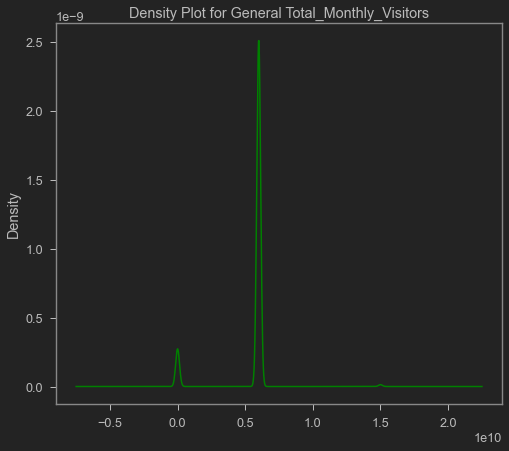

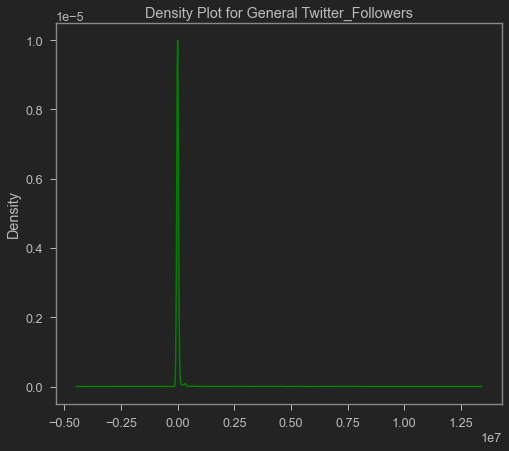

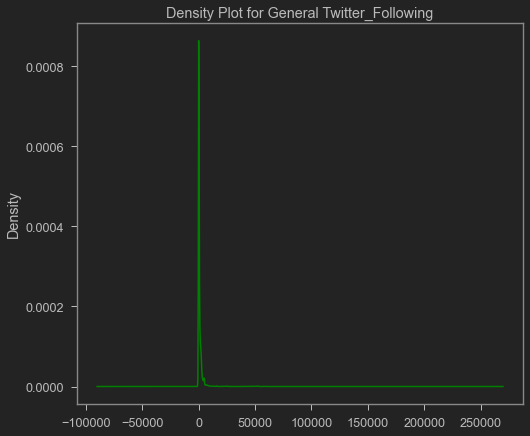

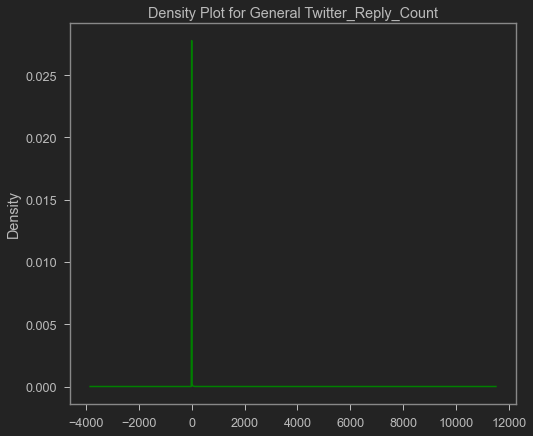

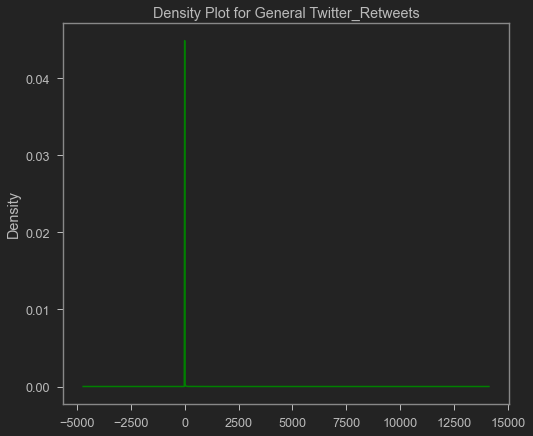

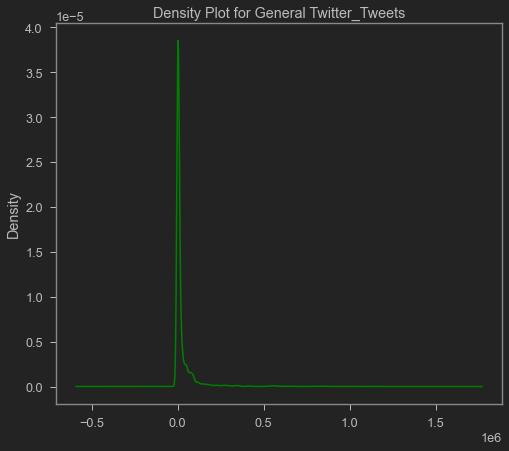

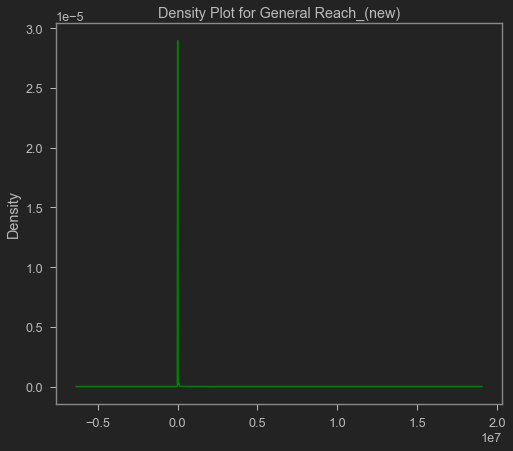

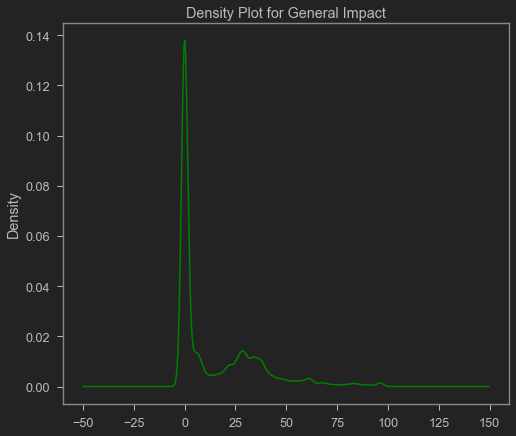

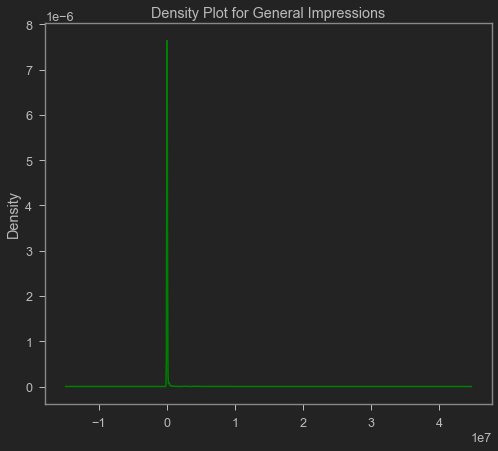

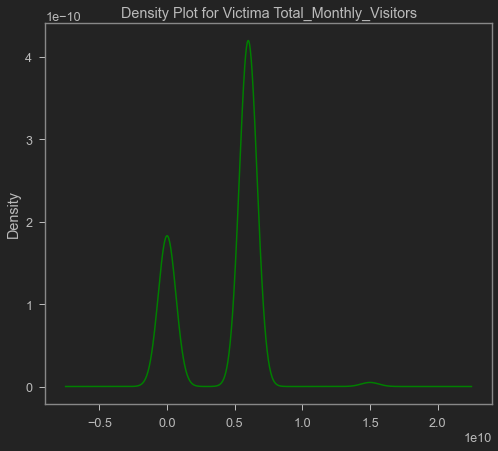

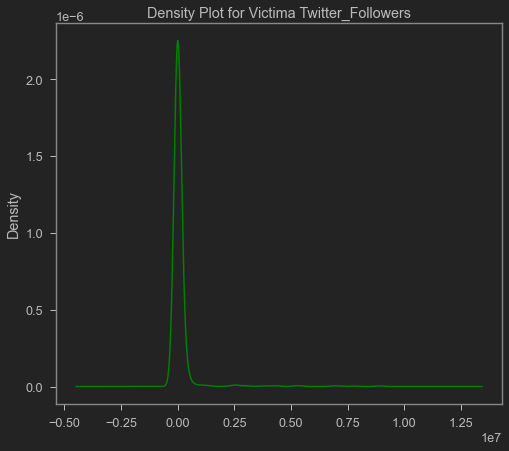

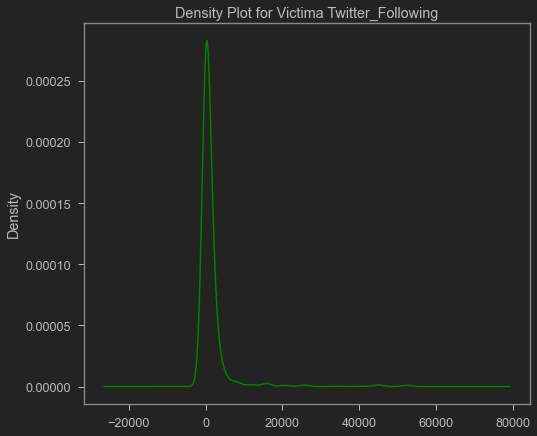

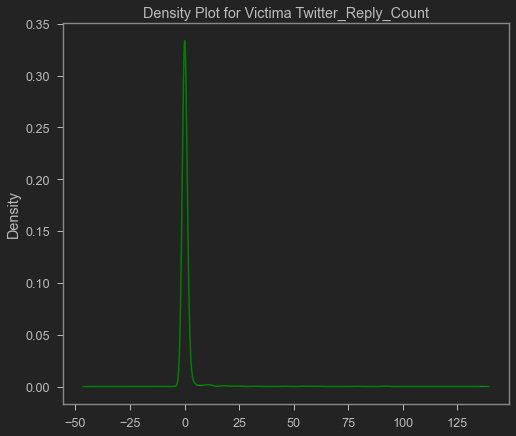

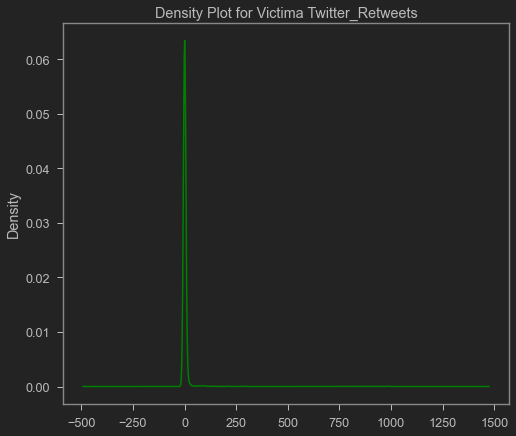

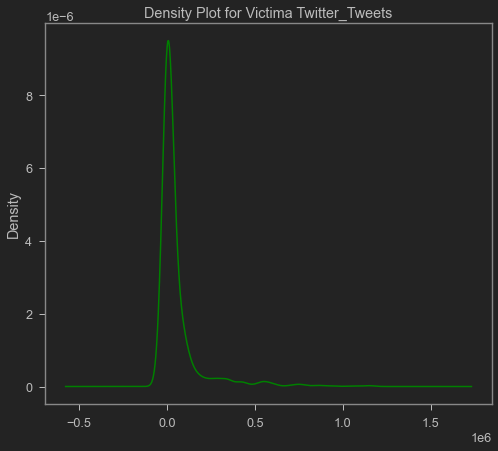

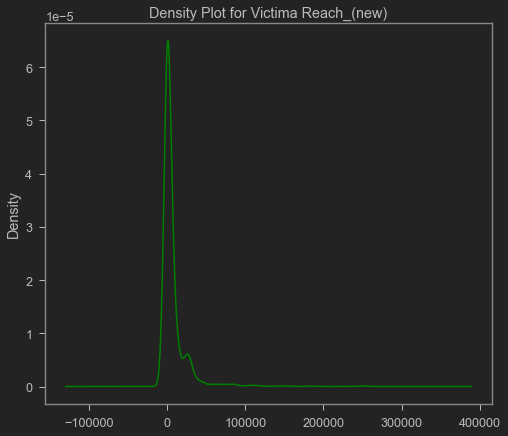

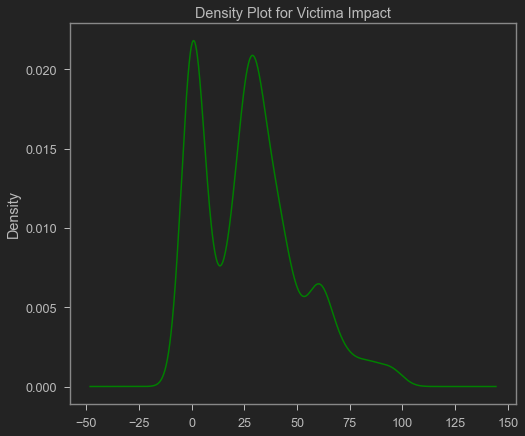

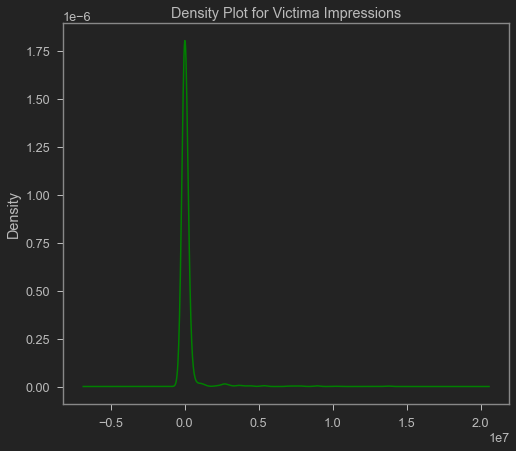

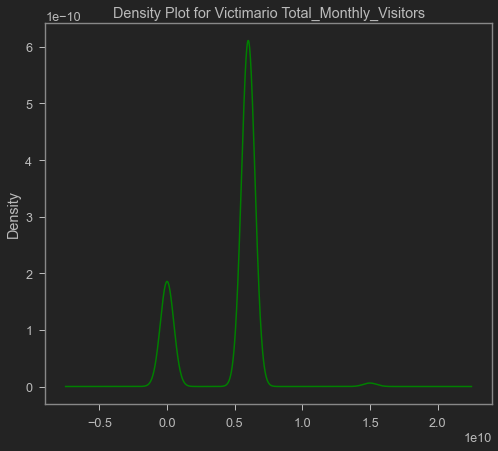

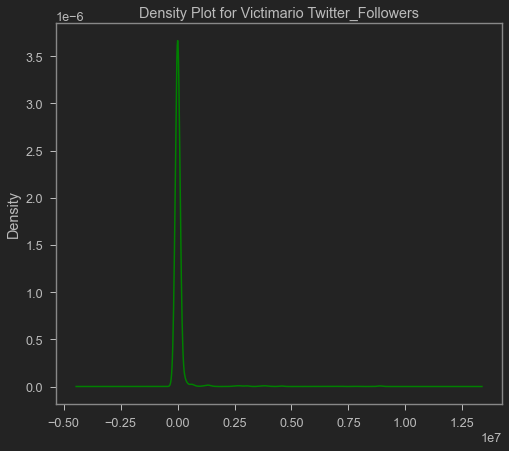

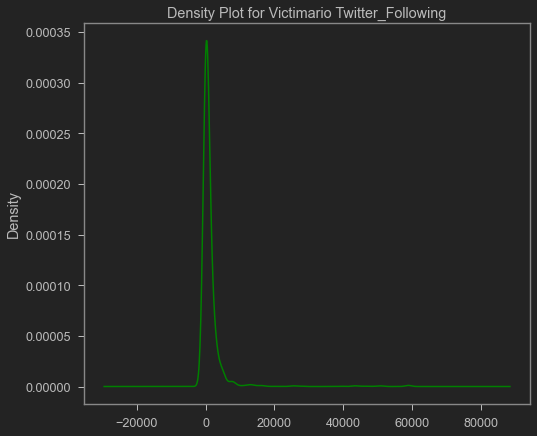

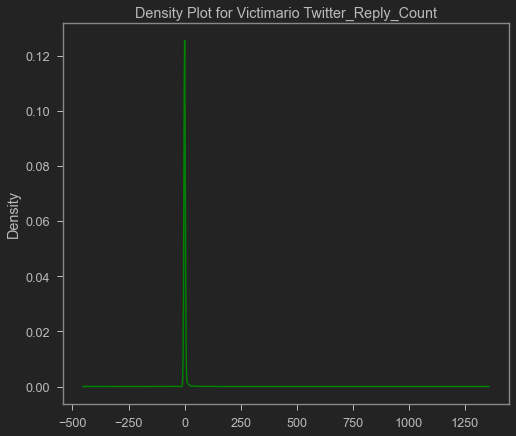

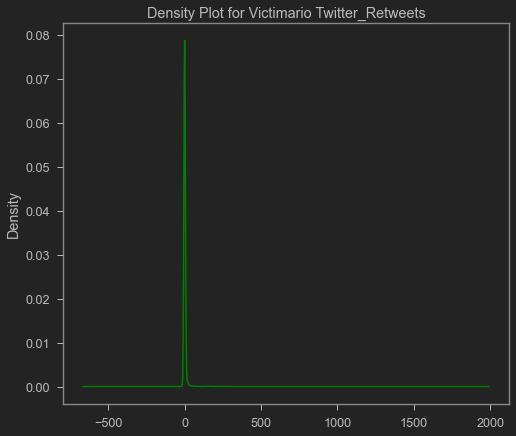

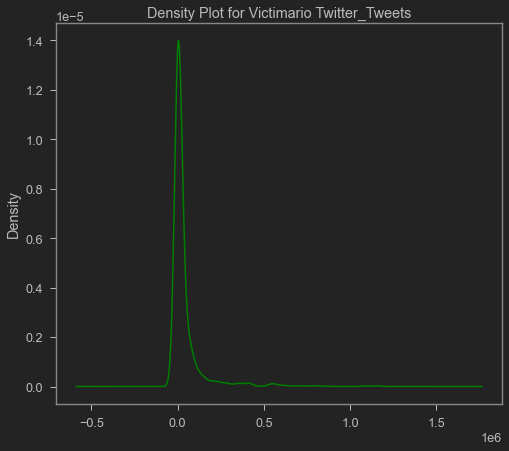

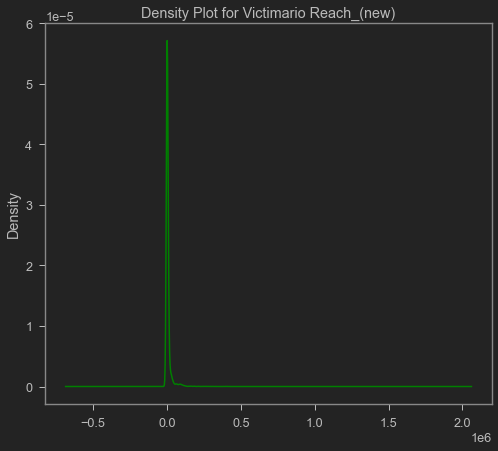

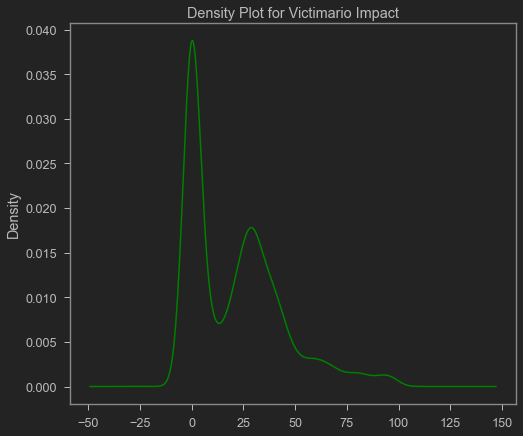

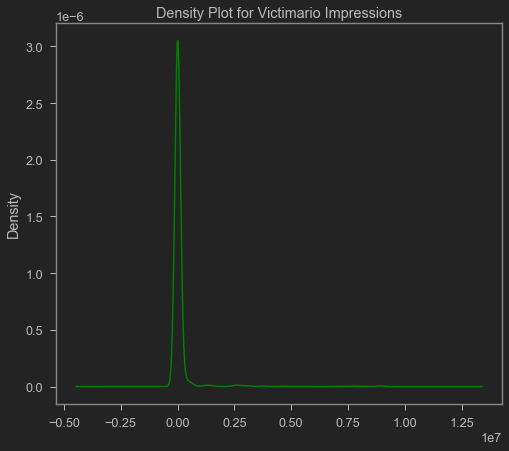

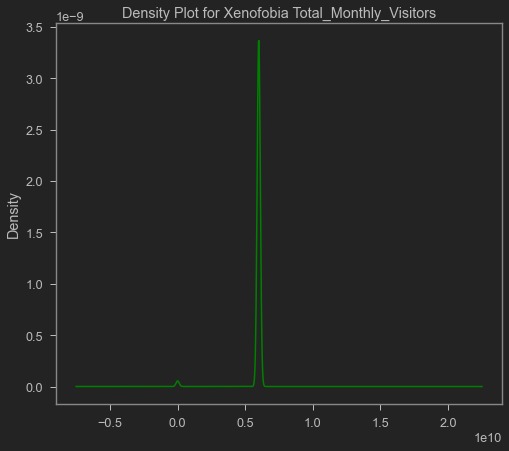

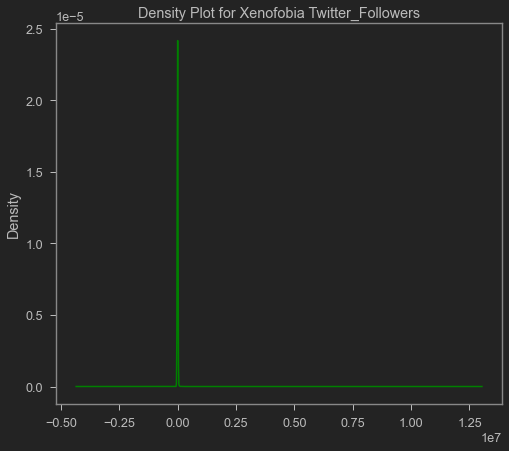

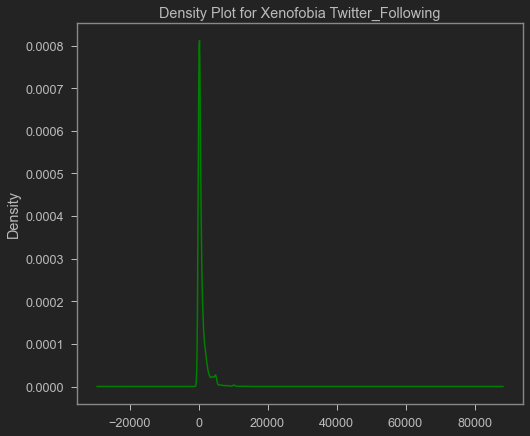

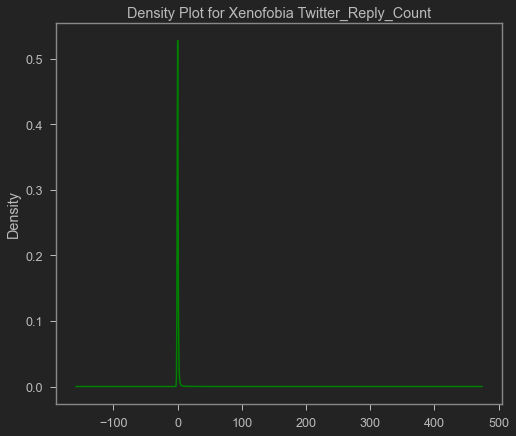

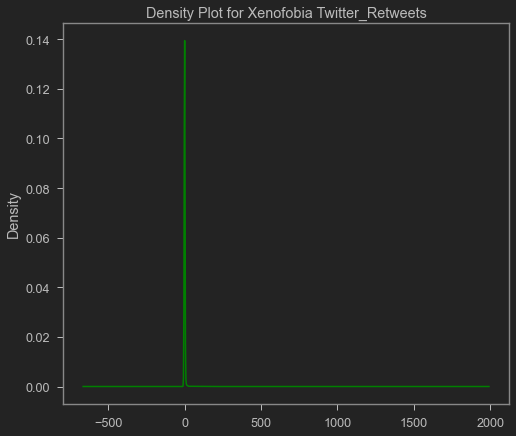

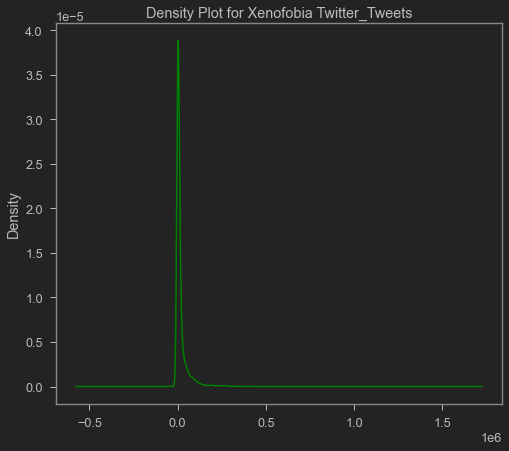

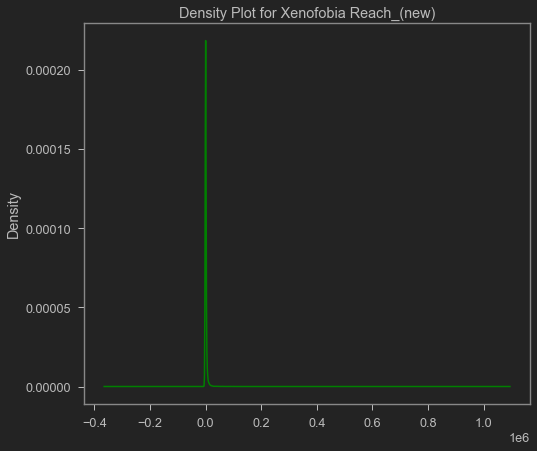

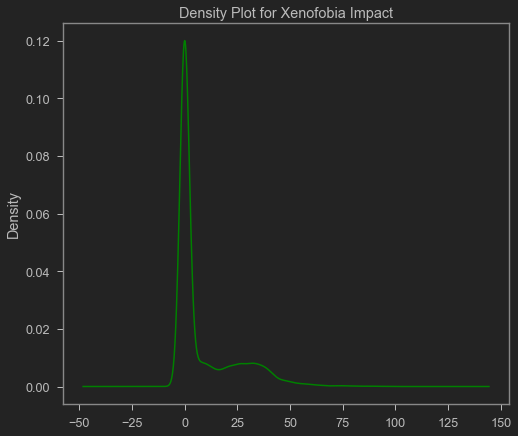

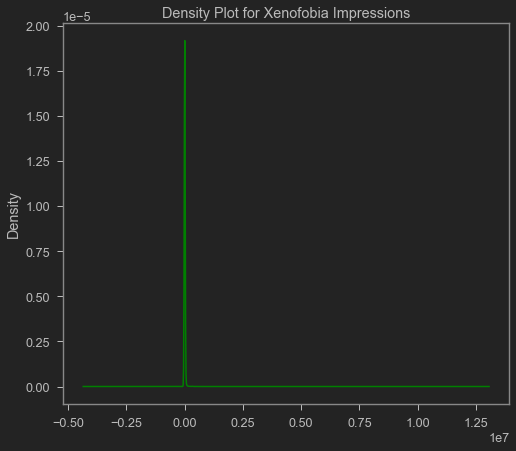

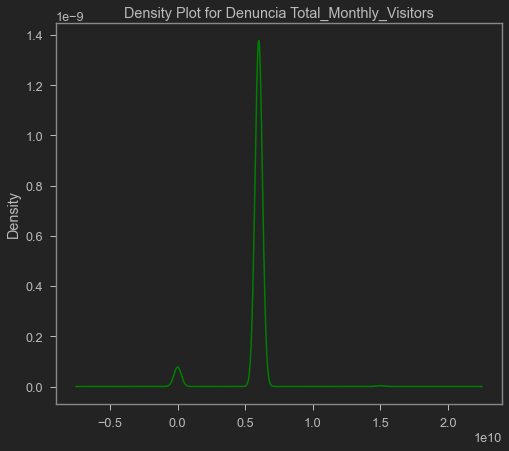

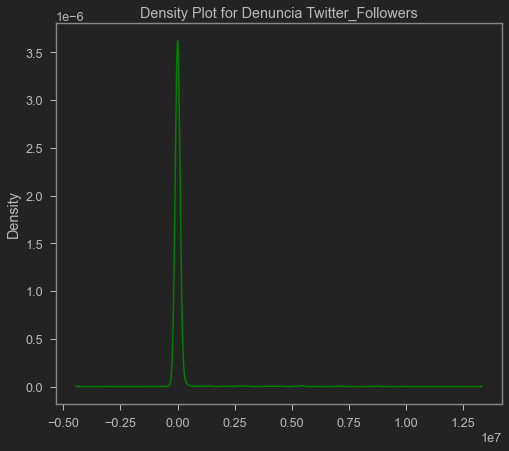

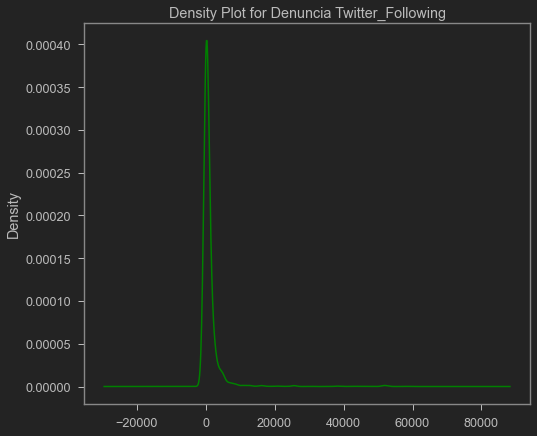

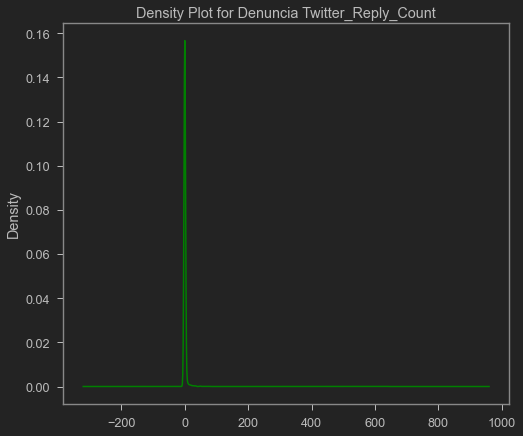

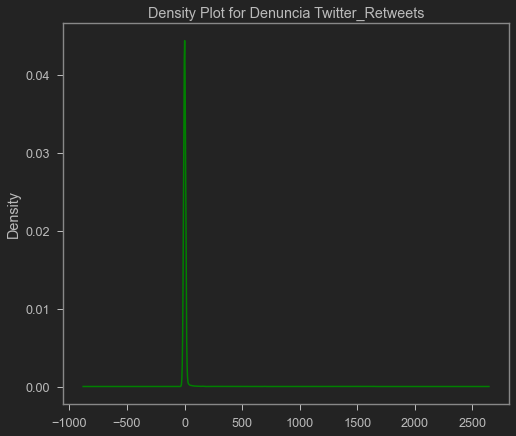

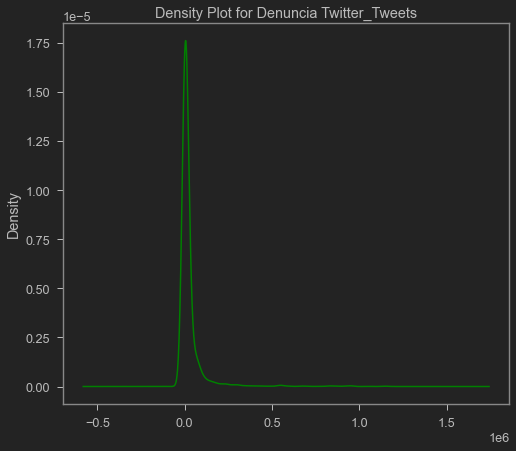

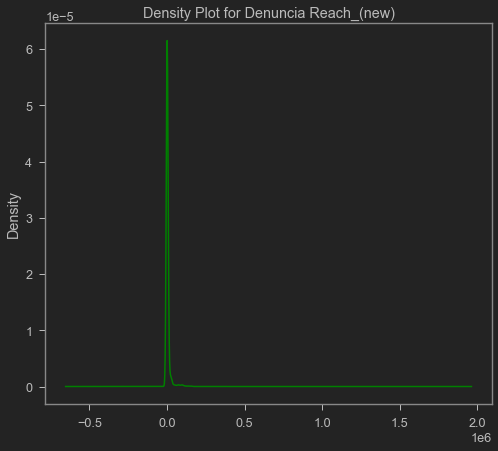

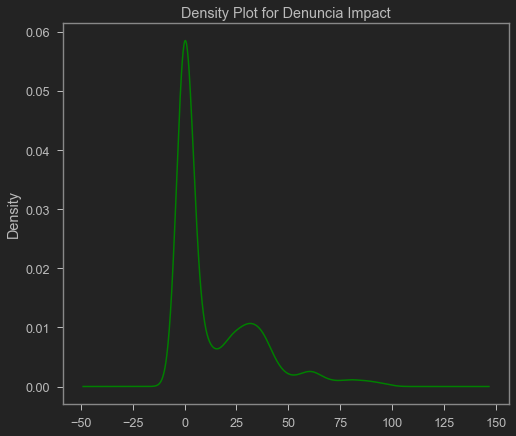

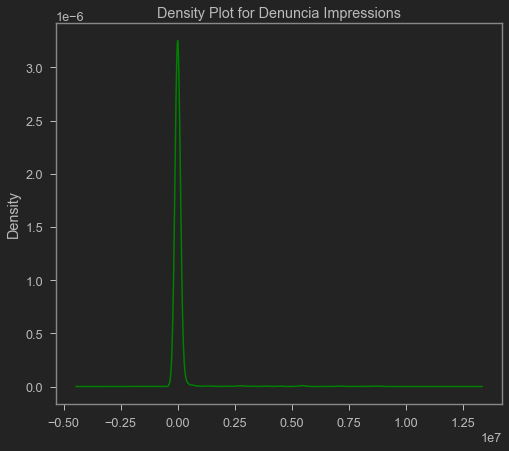

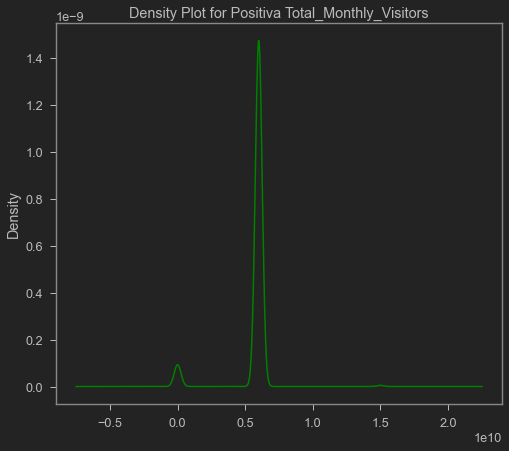

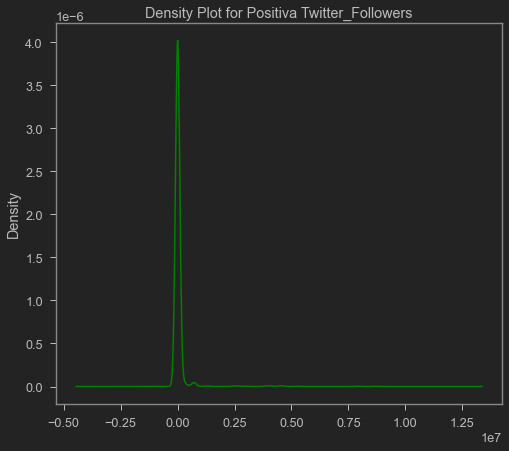

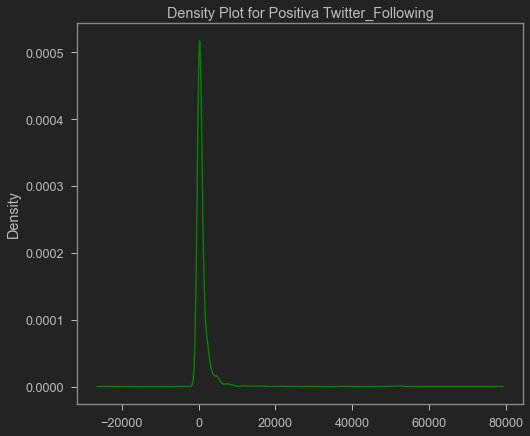

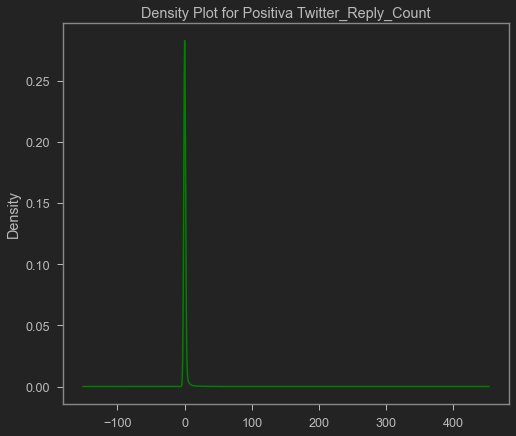

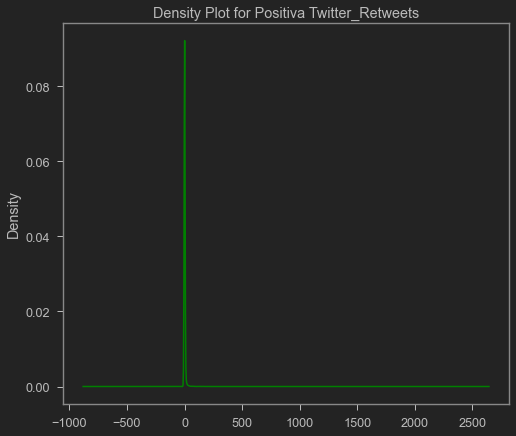

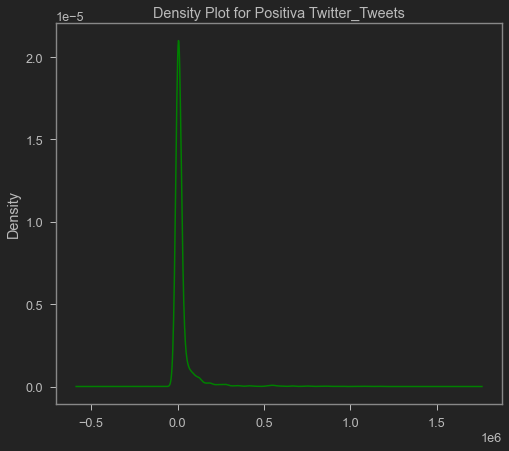

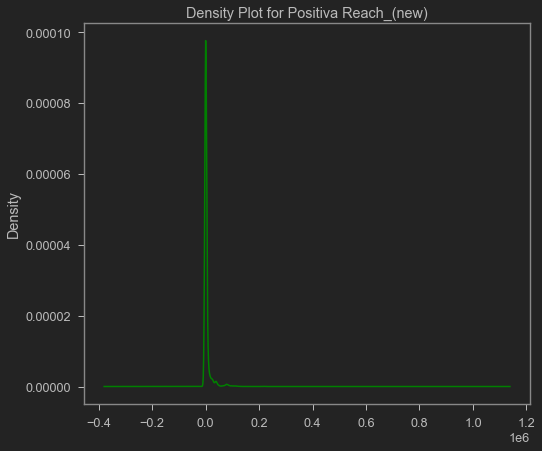

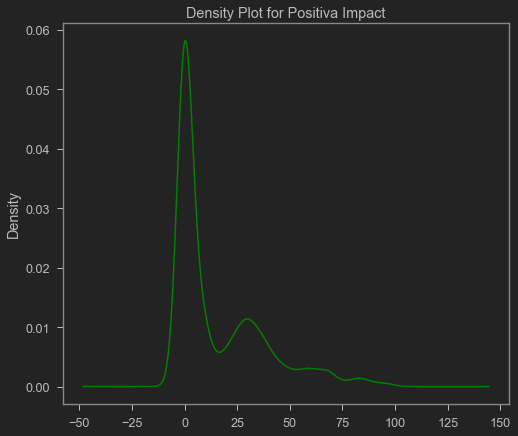

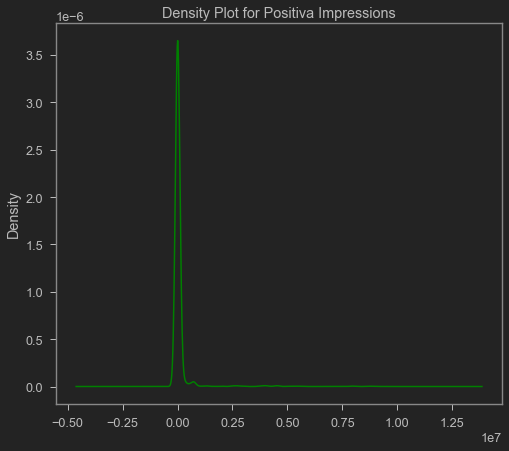

In [18]:
lista_numericas = ['Total_Monthly_Visitors', 'Twitter_Followers', 'Twitter_Following', 'Twitter_Reply_Count', 'Twitter_Retweets', 'Twitter_Tweets',
                   'Reach_(new)', 'Impact','Impressions']
lista_marcacion = ['General','Victima', 'Victimario', 'Xenofobia','Denuncia', 'Positiva']
for var_marcacion in lista_marcacion:
    for var_numerica in lista_numericas:
        if var_marcacion == 'General':
            df[var_numerica].plot.density(color='green')
            plt.title('Density Plot for ' + var_marcacion + ' ' + var_numerica)
            plt.show()
            #temporal.update({var_numerica : df[var_numerica].mean()})
        else:
            subset = df[df[var_marcacion] == 1]
            subset[var_numerica].plot.density(color='green')
            plt.title('Density Plot for ' + var_marcacion + ' ' + var_numerica)
            plt.show()
            #temporal.update({var_numerica : df.groupby(var_marcacion)[var_numerica].mean()[1]})
        #df_descriptivas.append(temporal, ignore_index = True)